# P2 Investigate a dataset  
## Dataset investigated - Titanic Passengers Dataset  
### Description of the dataset:  

Titanic dataset from [kaggle.com](https://www.kaggle.com/c/titanic/data). This dataset has datapoints of the titanic disaster ready for some analytics.  
In the dataset we will try to discover some interesting points and see what we can find.  

** VARIABLE DESCRIPTIONS:  **  

| DATAPOINT     | MEANING        
| ------------- |:-------------  
| survival      | survival Survival (0 = No; 1 = Yes) 
| pclass        | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
| name          | Name  
| sex           | Sex  
| age           | Age  
| sibsp         | Number of Siblings/Spouses Aboard  
| parch         | Number of Parents/Children Aboard  
| ticket        | Ticket Number  
| fare          | Passenger Fare  
| cabin         | Cabin  
| embarked      | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

SPECIAL NOTES:  
Pclass is a proxy for socio-economic status (SES) -- 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower  
Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5  
  
With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.  
  
Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic  
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)  
Parent:   Mother or Father of Passenger Aboard Titanic  
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic  
  
Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## Questions to answer  
1) Did the passengers gender make a difference on if they survived or not?  
2) Does where the people boarded give them a better chance of survival?  
3) Did the passengers class in society give them a better chance of survival?

#### Import statements to view the dataset, read the dataset into a Pandas dataframe and graph inline 

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

titanic_data = pd.read_csv("titanic_data.csv")

Populating the interactive namespace from numpy and matplotlib


#### Clear NaN or missing info from dataset

In [14]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Already I can see just by the head that there are a lot of datapoints removed. We'll need to make sure we capture the total passenger count for future calculations.

In [15]:
# This should equal 891 for this dataset.
total_passenger_count = len(titanic_data) 

In [16]:
# The rows that have incomplete data. This should equal 708
incomplete_data_count = total_passenger_count - len(titanic_data.dropna()) 

# The complete data count. This should equal 183
complete_data_count = total_passenger_count - incomplete_data_count

# Percent of missing data
missing_data_percent = 100 - len(titanic_data.dropna()) * 1.0 / len(titanic_data) * 100 # 79.46127946127946 percent
print "{} = {}".format("Percentage of missing data", missing_data_percent)

Percentage of missing data = 79.4612794613


Hrm, the dataset has a lot of NaN entries in it. The majority of this data is coming from the 'Cabin' column.  Let's loot at the rest of the columns that have the most and determine if we need these columns or not.

The column cabin has 687 blank cells. This looks like a good candidate for cleansing.  
Let's replace the NaN values in the Cabin column and see what our missing values percentage is after cleansing it.  

In [17]:
# Percentage of missing values by column
titanic_data.isnull().sum() / float(len(titanic_data)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

While it might be better to leave the data as is, we should clean this to assure that we can do some calculations if needed. Let's replace them with the word 'unknown'.  

The column Age has 177 blanks but this would throw off some future metrics so let's leave this as is.

Let's also look at the total percentage of missing data before and after addressing the NaN in the cabin column

In [18]:
missing_values_before = np.mean(titanic_data.isnull().sum() / float(len(titanic_data)) )
missing_values_before

0.08099513655069211

In [19]:
titanic_data['Cabin'].fillna('unknown', inplace=True)

In [21]:
missing_values_after = np.mean(titanic_data.isnull().sum() / float(len(titanic_data)) )
missing_values_after

0.016741488963711186

We see that before cleaning the NaN out of the Cabin column we have 8% missing data.  After cleaning the data in the Cabin column only, we have just over 1.6 percent. This is much better and allows us to run some analysis with a higher confidence.

In [132]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S


#### General statistics from dataset   

What do we see? Using the describe we can get some information on the dataset as it is. Let's see what we have.  

In [133]:
# Show some basic statistics of the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We see that there are 891 passengers.  
The average age is just over 29 years old.  
The average fare was around $32.20.  
The oldest passenger was 80 years old while the youngest was about 5 months (almost half a year old).  

If we wanted to find data on a particular column, we could do the same thing but specify a column. Let's look at the Sex column to see what we have.  

In [134]:
# Show some basic statistics of a column. In this case the 'Sex' column.
titanic_data['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

We see that there are 891 items in the dataset. That was expected.  
The unique counts the total different variations that are found in this column. In this case 2 for male and female.  
We see that the top point in the dataset is 'male' and it's frequency is 577; about 0.647 or 65 percent.

#### Did the passengers gender make a difference on if they survived or not?

In [135]:
# Find the number of passengers male and female. 
male_passenger_count = titanic_data.Sex.value_counts()['male']
female_passenger_count = titanic_data.Sex.value_counts()['female']
print "{} = {}".format("Number of male passengers", male_passenger_count)
print "{} = {}".format("Number of female passengers", female_passenger_count)

# Find the percentages of males and females onboard
male_percentage = (male_passenger_count * 1.0)/ (total_passenger_count) * 100
female_percentage = (female_passenger_count * 1.0)/ (total_passenger_count) * 100
print "{} = {}".format("Percent of female passengers", female_percentage)
print "{} = {}".format("Percent of male passengers", male_percentage)

Number of male passengers = 577
Number of female passengers = 314
Percent of female passengers = 35.241301908
Percent of male passengers = 64.758698092


##### Graph the number of men and women aboard

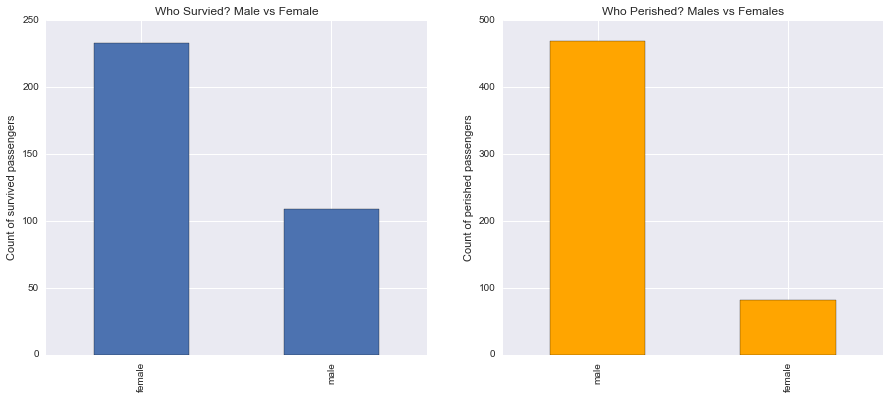

In [136]:
# Use plt.figure to plot two different grpahs side by side.
fig = plt.figure(figsize=(15,6))
fig.add_subplot(121)
# Plot the male vs female survivors.
titanic_data.Sex[titanic_data.Survived == 1].value_counts().plot(kind='bar')
title("Who Survied? Male vs Female")
plt.ylabel("Count of survived passengers")

fig.add_subplot(122)
# Plot the male vs female victims.
titanic_data.Sex[titanic_data.Survived  == 0].value_counts().plot(kind='bar', color='orange')
title("Who Perished? Males vs Females")
plt.ylabel("Count of perished passengers")

For question 1, "Did the passengers gender make a difference on if they survived or not?" we can easily see that there was definately a women & children first ideology. While the male survivors were just over 100 the women doubled that and then some approaching 250. This doesn't seem that offsetting at first but let's also look at those that perished.  
Less than 100 females perished, close to 500 male lives were cut short.  
Let's see the actual numbers of survivors and victims.  

In [137]:
victims = titanic_data.Sex[titanic_data.Survived  == 0].value_counts()
survivors = titanic_data.Sex[titanic_data.Survived  == 1].value_counts()
print "Victims\n", victims
print 
print "Survivors\n", survivors

Victims
male      468
female     81
Name: Sex, dtype: int64

Survivors
female    233
male      109
Name: Sex, dtype: int64


** In short, males fared far worse than females in their survival rate. **  
We can clearly see that the rate of survival differed between men & women. More men were killed in this tragedy than women even when you take into account the ratio of men to women abord the ship.

### 2) Does where the people boarded give them a better chance of survival?  

The first thing to do is isolate pair survivors or victims based on their port call. This will allow us to see how many survived or died based on the port where they boarded the Titanic.

In [138]:
died = titanic_data.Embarked[titanic_data.Survived  == 0].value_counts()
survivors = titanic_data.Embarked[titanic_data.Survived  == 1].value_counts()
print "Died\n", died, "\n\n", "Survived\n", survivors

Died
S    427
C     75
Q     47
Name: Embarked, dtype: int64 

Survived
S    217
C     93
Q     30
Name: Embarked, dtype: int64


Personally, I like looking at charts along with a pivot table. To me it's like peanut butter & chocolate.  

<bound method DataFrame.pivot_table of Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217>

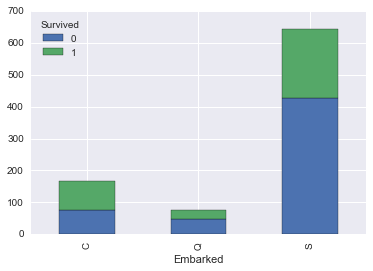

In [139]:
grouped_data = titanic_data.groupby(['Embarked', 'Survived'])['Survived'].count().unstack()
grouped_plot = grouped_data.plot(kind='bar', stacked=True)
grouped_data.pivot_table

With the following ports as destinationsof embarking, we can see that the survival rates are highest in Southampton.  
However Southampton also has the most passengers in total. Southampton was the first port of call, Cherbourgh was the second while Queenstown was third.  [Titanic Route](https://www.google.com/maps/d/u/0/viewer?mid=1_wHu5MbgJEPHFScw7qdaMF3nkMg&hl=en_US)  

In [140]:
embarked_totals = titanic_data.Embarked.value_counts()
print embarked_totals
print
survived_by_port = titanic_data.Embarked[titanic_data.Survived == 1].value_counts()
print survived_by_port

S    644
C    168
Q     77
Name: Embarked, dtype: int64

S    217
C     93
Q     30
Name: Embarked, dtype: int64


The hard coded numbers are fine but let's see them in a chart. We'll use those numbers to verify our calulations this time. The reason that we don't want to hard code numbers is in case we add more to the dataset, we'll then need to change the code in multiple places.

Rather than the embarked totals, lets use the total number of survivors to get a percentage of people that survived per port of call.

In [141]:
print "Southampton survival percentage", 217.0/(340)
print "Cherbourgh survival percentage", 93.0/(340)
print "Queenstown survival percentage", 30.0/(340)

Southampton survival percentage 0.638235294118
Cherbourgh survival percentage 0.273529411765
Queenstown survival percentage 0.0882352941176


We have survival percentages by port of call, lets look at that visually.

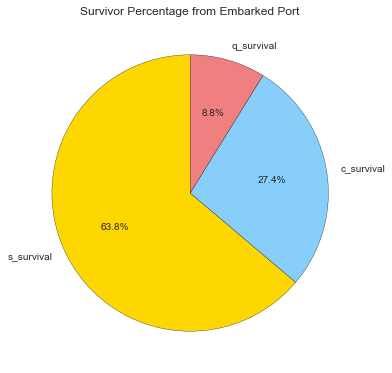

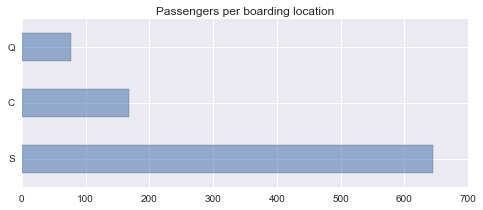

In [142]:
figure(1, figsize=(6,6))
fig.add_subplot(121)
ax = axes([0.1, 0.1, 0.8, 0.8])
s_survival = (titanic_data.Survived[titanic_data.Embarked == 'S'][titanic_data.Survived == 1].value_counts()
             ) / survivors.sum()
c_survival = (titanic_data.Survived[titanic_data.Embarked == 'C'][titanic_data.Survived == 1].value_counts()
             ) / survivors.sum()
q_survival = (titanic_data.Survived[titanic_data.Embarked == 'Q'][titanic_data.Survived == 1].value_counts()
             ) / survivors.sum()

labels = ['s_survival', 'c_survival', 'q_survival']
sizes = [s_survival[1], c_survival[1], q_survival[1]]
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
title('Survivor Percentage from Embarked Port')

figure(2, figsize=(8,3))
fig.add_subplot(222)
titanic_data.Embarked.value_counts().plot(kind='barh', alpha=0.55)
title("Passengers per boarding location");

That looks nice. However since the ratios of people boarding at each port vary so differently, this can't really be used for true measures of survival. What we can say is that the highest percentage of people that did survive comes from Southampton while the lowest is Queenstown. That matches the number of people that were on the boat.  

Let's look at the last question, does class of passenger matter, to see if we can get some more data. 

### 3) Did the passengers class in society give them a better chance of survival?

How many people survived in total? That's easy enough. Let's use the dataframe to sum up all the data in the Pclass that has a neighboring column where Survived is equal to 1. 

In [143]:
titanic_data.Pclass[titanic_data.Survived == 1].sum()

667

We see that there are 667 passengers that survived. That should give us a good base to see where the survivors should count up to.  

What about the distribution of the classes? What does that look like?

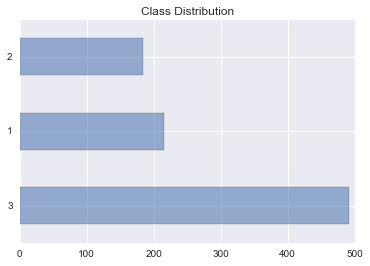

In [144]:
titanic_data.Pclass.value_counts().plot(kind="barh", alpha=a_bar)
title("Class Distribution")

In [145]:
first_class = titanic_data.Survived[titanic_data.Pclass == 1].value_counts()
second_class = titanic_data.Survived[titanic_data.Pclass == 2].value_counts()
third_class = titanic_data.Survived[titanic_data.Pclass == 3].value_counts()
# print first_class
# print second_class
print third_class

0    372
1    119
Name: Survived, dtype: int64


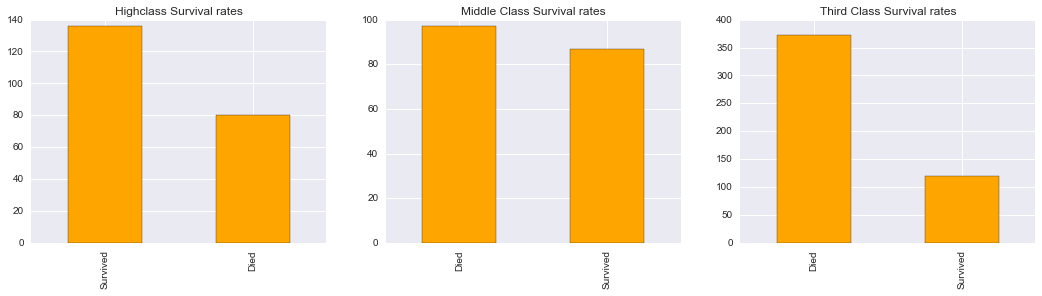

In [146]:
# Use fig to set the figure size and hold the plots when using multiple plots on one line
fig=plt.figure(figsize=(18,4) )

# Set the axis for each subplot in the figure. 
# The subplot parameters are row, plots in total and plot number/position.
# This shows that add_subplot is for one row, there are three plots on the row and this is the first plot.
ax1=fig.add_subplot(131)
titanic_data.Survived[titanic_data.Pclass  == 1].value_counts().plot(kind='bar', color='orange')
ax1.set_xticklabels(["Survived", "Died"])
title('Highclass Survival rates')

# This shows that add_subplot is for one row, there are three plots on the row and this is the second plot.
# To show scope and scale, we could add sharey=ax1 to each graph but this seemed to show the results that 
# didn't make them easily to understand different. 
ax2=fig.add_subplot(132)
titanic_data.Survived[titanic_data.Pclass  == 2].value_counts().plot(kind='bar', color='orange')
ax2.set_xticklabels(['Died', 'Survived'])
title('Middle Class Survival rates')

# This shows that add_subplot is for one row, there are three plots on the row and this is the third plot.
# In this case we want the plots to share the same axis as the first one, 'hence sharey=ax1'
ax3=fig.add_subplot(133)
titanic_data.Survived[titanic_data.Pclass  == 3].value_counts().plot(kind='bar', color='orange')
ax3.set_xticklabels(['Died', 'Survived'])
title('Third Class Survival rates')

What we see here is that there was definately not only a women & children first ideology but the people that booked a first class ticket had a higher rate of survival. Out of 226 first class passengers, 136 of them survived. That's a 60% survival rate. This is better than the 47% that the middle class saw and even more than the 24% that the third class passengers had.

### Conclusion

The femals that boarded had a significant rate of survival in comparrison to the males. 
There was definately a "women & children first" ideology being shown.
Along with this we also saw that the higher class ticket you held the better the chance you had to survive. 
Finally, while we looked at where the passengers boarded the ship, we can't truly tell with this analysis if that had any bearing on if the passengers survival rate was higher or not.
To investigate this we'd need to do more analysis such as coupling the class of the passenger with their gender AND their port of call and seeing these all together. 